In [1]:
import os
from collections import Counter

import sklearn.cluster
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from scipy.cluster import hierarchy

from fuzzywuzzy import fuzz, process
from Litho.nlp_funcs import *
from Litho.similarity import (check_similarity, match_lithcode, jaccard_similarity, 
                              calc_similarity_score, print_sim_compare)

In [2]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
stopw2 = ['redish', 'reddish', 'red', 'black', 'blackish', 'brown', 'brownish',
          'blue', 'blueish', 'orange', 'orangeish', 'gray', 'grey', 'grayish',
          'greyish', 'white', 'whiteish', 'purple', 'purpleish', 'yellow',
          'yellowish', 'green', 'greenish', 'light', 'very', 'pink','coarse',
          'fine', 'medium', 'hard', 'soft', 'coloured', 'multicoloured',
          'weathered', 'fractured', 'dark', 'color', 'colour', 'clean', 'cleaner']

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(stopw2)  # add the additional stopwords above

In [3]:
# Testing out processes - let's see if we're actually getting accurate results
sents = [
    'sand brown',
    'gravel clay',
    'gravel water bearing',
    'red sand',
    'basalt',
    'basalt deep',
    'Sand gravel water supply stones some clay bands',
    'Sand gravel some clay bands',
    'sand and clay',
    'clay sand'
]

In [4]:
words = []
for wds in sents:
    words.extend(tokenize_and_stem(wds, stopwords))

In [5]:
words = list(set(words))

In [6]:
words

['bear',
 'water',
 'deep',
 'suppli',
 'band',
 'gravel',
 'sand',
 'clay',
 'stone',
 'basalt']

In [7]:
nrows = len(sents)
ncols = len(words)

tmp = np.zeros((nrows, ncols))
for r_i in range(nrows):
    for c_i in range(ncols):
        if words[c_i] in sents[r_i]:
            tmp[r_i, c_i] = 1.0

# for row in sents:
#     tmp = row.tokens
#     for w in tmp:
#         word_matrix.at[row.Index, w] = 1
#     # End for
# # End for

In [8]:
tmp

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0.]])

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=5)  # , whiten=True
compressed = pca.fit_transform(tmp)

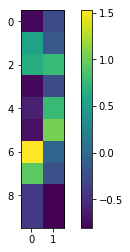

In [10]:
%matplotlib inline

plt.imshow(compressed)
plt.colorbar()

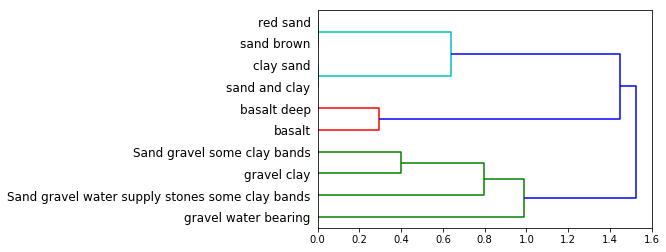

In [11]:
names = sents[:]
threshold = 0.1
linkage = hierarchy.linkage(compressed, method="centroid")
clusters = hierarchy.fcluster(linkage, threshold, criterion="inconsistent")
dendro = hierarchy.dendrogram(linkage, labels=names, orientation='right')
                              # truncate_mode='level', p=10) # last two settings tell it to only show the last 'p'
